In [ ]:
#| default_exp experimental

# experimental

> Experimental `dialoghelper` capabilities.

In [ ]:
#| export
from dialoghelper.core import *
from fastcore.all import *
from fasthtml.common import Div,Script
from httpx import post as xpost
from importlib import resources
from lisette.core import *

import base64,json,uuid,time

In [ ]:
from IPython.display import display, Image

In [ ]:
#| export
def iife(code: str) -> str:
    "Wrap javascript code string in an IIFE and execute it via `add_html`"
    trigger_script = f'''
(async () => {{
{code}
}})();
'''
    add_html(Div(Script(trigger_script), hx_swap_oob=f'beforeend:#js-script'))

In [ ]:
#| export
def start_share():
    iife((resources.files('dialoghelper')/'js.js').read_text())
    iife('await setupVideoStream();')

In [ ]:
start_share()

In [ ]:
#| export
def capture_screen():
    'Capture screenshot, automatically starting screen share if needed.'
    idx = uuid.uuid4()
    iife(f"send('{idx}', {{img_data: await getScreenshot()}});")
    time.sleep(0.5)
    d = dict2obj(xpost('http://localhost:5001/pop_data_blocking_', data={'data_id': idx}).json())
    if 'img_data' in d: return ToolResponse([{'type': 'image_url', 'image_url': d.img_data}])
    else: return f'Capture failed: {d.error}'

Hey solveit, please use &`capture_screen` and tell me what the image shows

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->



<details class='tool-usage-details'>

```json
{
  "id": "toolu_019ceUrCcNQNjX5duqxxFJUA",
  "call": {
    "function": "capture_screen",
    "arguments": {}
  },
  "result": "ToolResponse(content=[{'type': 'image_url', 'image_url': '<TRUNCATED>"
}
```

</details>

The image shows a code editor or development environment with what appears to be Python or similar code. I can see several code cells or sections visible on the screen. The code seems to be related to some kind of dialog or helper functionality, with imports and function definitions visible. The interface appears to be a notebook-style environment, possibly Jupyter or a similar tool.

The visible code includes:
- Import statements from various modules like `dialoghelper.core`, `fastcore.all`, `fasthtml.common`, etc.
- Some function definitions including what looks like an `iife` function that wraps JavaScript code
- References to video streaming setup with `setupVideoStream()`
- Multiple code cells that have been executed

The overall layout suggests this is a development environment for working with web-related code that involves dialog helpers and potentially video streaming functionality.

In [ ]:
res = capture_screen(); res.content[0].keys()

dict_keys(['type', 'image_url'])


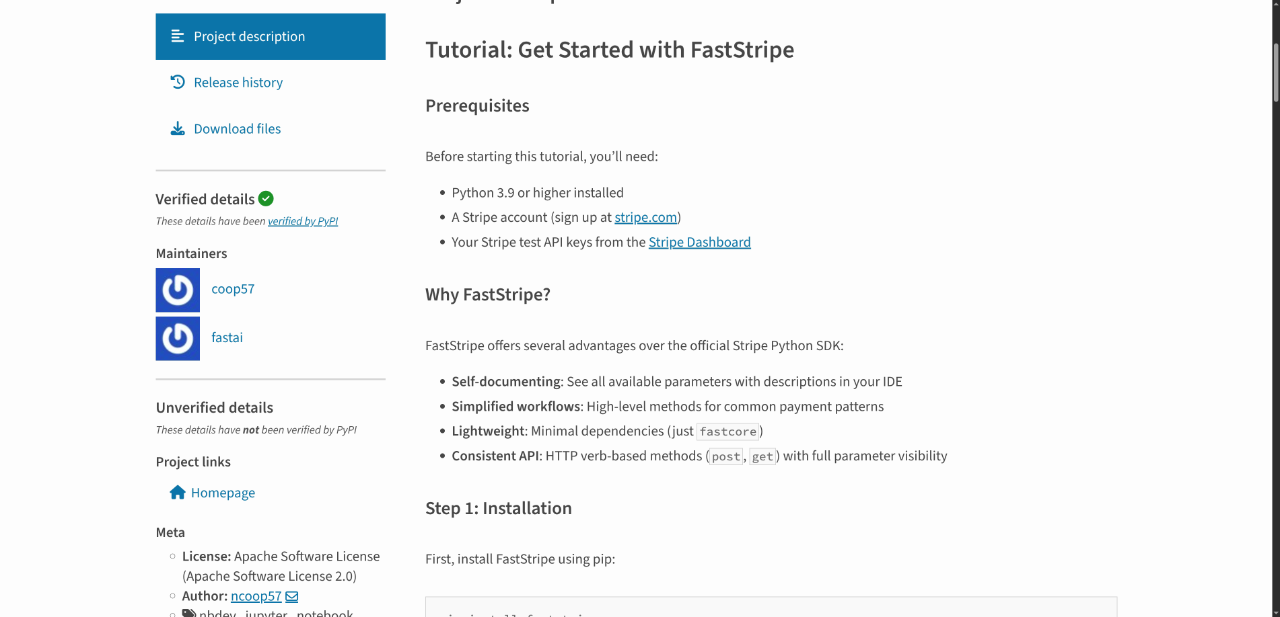

In [ ]:
display(Image(url=res.content[0]['image_url']))

In [ ]:
c = Chat('claude-sonnet-4-5-20250929', tools=[capture_screen]); c

<lisette.core.Chat>

In [ ]:
c('please view my screen and describe what you see', max_steps=10)

I can see a documentation page for **FastStripe**, which appears to be a Python library. Here's what's displayed:

## Main Content:
**"Tutorial: Get Started with FastStripe"**

### Prerequisites section lists:
- Python 3.9 or higher installed
- A Stripe account (with a link to stripe.com)
- Stripe test API keys from the Stripe Dashboard

### "Why FastStripe?" section highlights:
- **Self-documenting**: See all available parameters with descriptions in your IDE
- **Simplified workflows**: High-level methods for common payment patterns
- **Lightweight**: Minimal dependencies (just `fastcore`)
- **Consistent API**: HTTP verb-based methods (`post`, `get`) with full parameter visibility

### Step 1: Installation
Shows instructions to install FastStripe using pip

## Left Sidebar contains:
- **Project description** (currently selected)
- Release history
- Download files
- **Verified details** (verified by PyPI) with maintainers: coop57 and fastai
- **Unverified details** section
- **Project links** including Homepage
- **Meta information**: Apache Software License 2.0, Author: ncoop57

This appears to be a PyPI (Python Package Index) documentation page for the FastStripe library, which is a wrapper for the Stripe payment API.

<details>

- id: `chatcmpl-d6e657cc-a382-4f28-a2ff-00b2a11867f7`
- model: `claude-sonnet-4-5-20250929`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=308, prompt_tokens=1688, total_tokens=1996, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

## export -

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()